In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

In [76]:
avo = pd.read_csv("avocado.csv",parse_dates=['Date'], index_col = 0)
avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Let's filter our data by region Chicago

In [77]:
avo = avo[avo.region == 'Chicago']
avo

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,0.93,661137.13,42799.00,445218.79,78378.25,94741.09,83066.75,1617.67,10056.67,conventional,2015,Chicago
1,2015-12-20,0.91,690669.34,35724.99,464574.15,96306.30,94063.90,76241.25,9592.65,8230.00,conventional,2015,Chicago
2,2015-12-13,1.07,668601.50,40380.09,451470.42,94162.53,82588.46,76829.42,5693.75,65.29,conventional,2015,Chicago
3,2015-12-06,1.14,664020.49,53173.18,455048.11,92888.37,62910.83,62473.12,420.95,16.76,conventional,2015,Chicago
4,2015-11-29,1.11,602481.22,42851.47,422479.32,74988.97,62161.46,61862.57,298.89,0.00,conventional,2015,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.62,46956.84,313.29,32668.25,0.00,13975.30,13975.30,0.00,0.00,organic,2018,Chicago
8,2018-01-28,1.72,40770.94,215.40,31318.93,0.00,9236.61,9236.61,0.00,0.00,organic,2018,Chicago
9,2018-01-21,1.82,36688.67,83.93,28134.16,0.00,8470.58,8470.58,0.00,0.00,organic,2018,Chicago
10,2018-01-14,1.79,44955.89,133.39,31177.44,0.00,13645.06,13635.06,10.00,0.00,organic,2018,Chicago


### Looking at organic avocado only

In [78]:
avo = avo[avo.type == 'organic']
avo

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.58,20995.37,1064.71,19320.66,0.0,610.00,610.00,0.00,0.0,organic,2015,Chicago
1,2015-12-20,1.58,22452.30,730.65,21574.99,0.0,146.66,143.33,3.33,0.0,organic,2015,Chicago
2,2015-12-13,1.59,24059.71,876.48,23109.90,0.0,73.33,73.33,0.00,0.0,organic,2015,Chicago
3,2015-12-06,1.59,27081.13,819.66,26104.80,0.0,156.67,156.67,0.00,0.0,organic,2015,Chicago
4,2015-11-29,1.59,22168.32,457.29,21677.70,0.0,33.33,33.33,0.00,0.0,organic,2015,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.62,46956.84,313.29,32668.25,0.0,13975.30,13975.30,0.00,0.0,organic,2018,Chicago
8,2018-01-28,1.72,40770.94,215.40,31318.93,0.0,9236.61,9236.61,0.00,0.0,organic,2018,Chicago
9,2018-01-21,1.82,36688.67,83.93,28134.16,0.0,8470.58,8470.58,0.00,0.0,organic,2018,Chicago
10,2018-01-14,1.79,44955.89,133.39,31177.44,0.0,13645.06,13635.06,10.00,0.0,organic,2018,Chicago


### check missing values in our dataset

In [79]:
avo.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### convert column 'Date' in to data-time type and sort the data by date ascendingly 

In [80]:
avo['Date'] = pd.to_datetime(avo['Date'])
date = avo['Date']
avo = avo.sort_values('Date')
avo = avo.reset_index(drop=True)
avo

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.00,0.0,organic,2015,Chicago
1,2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.00,0.0,organic,2015,Chicago
2,2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.00,0.0,organic,2015,Chicago
3,2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.00,0.0,organic,2015,Chicago
4,2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.00,0.0,organic,2015,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2018-02-25,1.68,36432.65,246.73,29263.75,0.0,6922.17,6908.84,13.33,0.0,organic,2018,Chicago
165,2018-03-04,1.62,46026.58,1107.05,35255.03,0.0,9664.50,9654.50,10.00,0.0,organic,2018,Chicago
166,2018-03-11,1.66,41969.83,583.18,32382.95,0.0,9003.70,8990.36,13.34,0.0,organic,2018,Chicago
167,2018-03-18,1.66,35542.17,184.53,26955.74,0.0,8401.90,8398.57,3.33,0.0,organic,2018,Chicago


In [81]:
timeRange = (avo.Date[0],avo.Date[168])
timeRange

(Timestamp('2015-01-04 00:00:00'), Timestamp('2018-03-25 00:00:00'))

### Plot the scatter plot of organic avocado price in Chicago

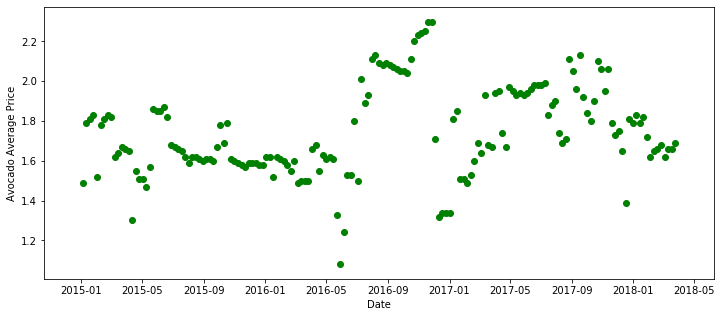

In [82]:
fig, axes = plt.subplots(figsize=(12,5))
axes.scatter(avo['Date'], avo['AveragePrice'], color='green')
axes.set_xlabel('Date')
axes.set_ylabel('Avocado Average Price')
plt.show()

### Plot the boxplot

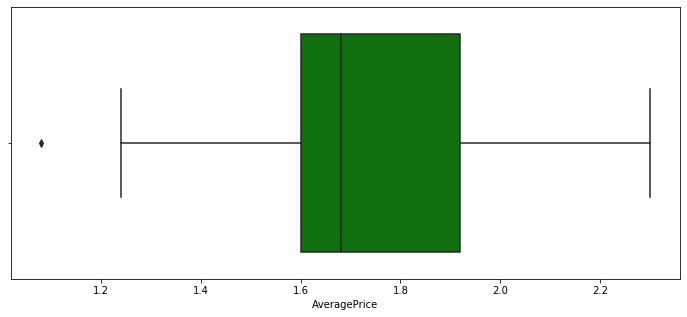

In [83]:
sns.boxplot(x=avo['AveragePrice'], color = 'green')
plt.show()

#### By looking at the scatterplot and boxplot, we can see there is 1 outlier in our dataset.
#### The price of organic avocado dropped below 1.2 in a week in mid June.

### Let's plot the histogram for average price of avocado

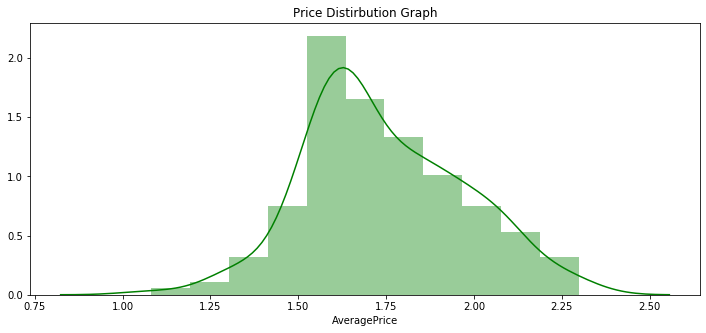

In [84]:
plt.figure(figsize=(12,5))
plt.title("Price Distirbution Graph")
ax = sns.distplot(avo["AveragePrice"], color = 'green')

#### As we can see here, the distribution is nearly normal distribution
### Now let's plot the avocado's price over time

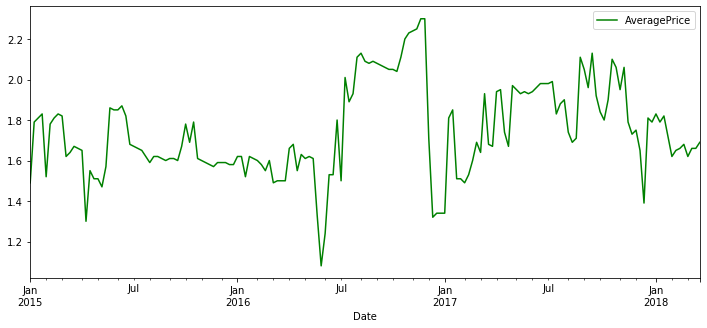

In [85]:
price = avo[['Date','AveragePrice']]
price.set_index('Date').plot(figsize=(12,5), color = 'green')
plt.show()

#### The graph seems not very clear to look at, , let's make it more visible
### Instead of using the average weekly price, let's resampling our data of the average monthly price and use the first day of each month as the time stamp.

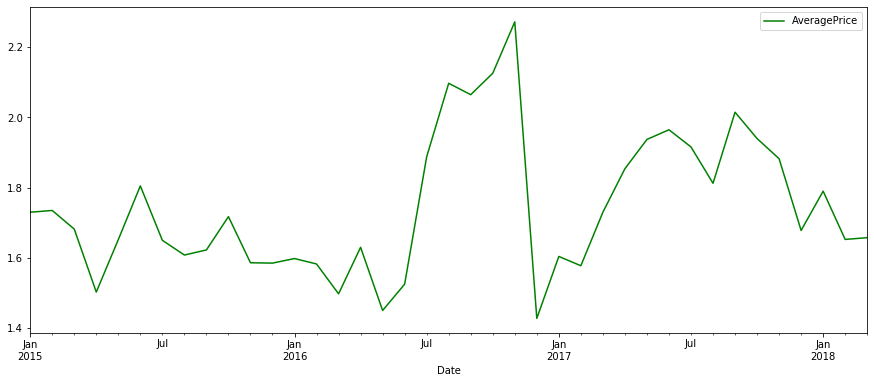

In [86]:
price = avo[['Date','AveragePrice']]
priceMS = price.set_index('Date').resample('MS').mean()
priceMS.plot(figsize=(15, 6), color= 'green')
plt.show()

#### Let's plot our data year by year

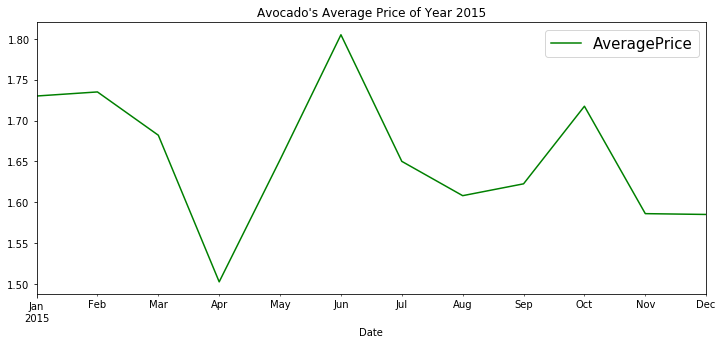

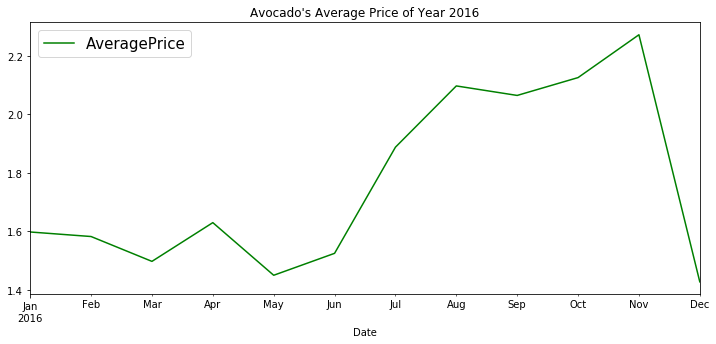

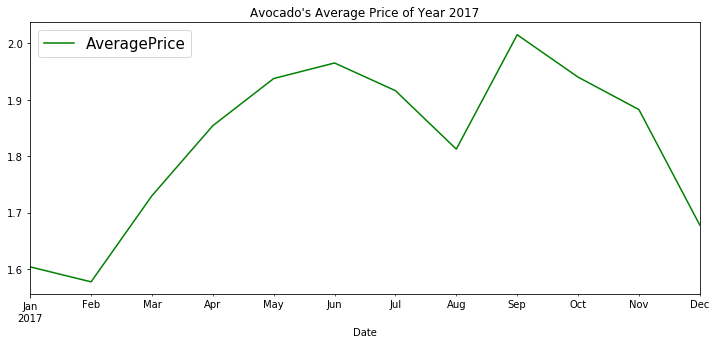

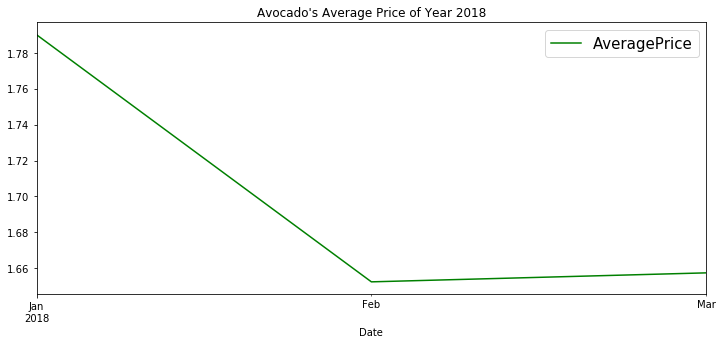

In [87]:
years = np.unique(avo['year'])

for year in years:
    price = avo[['Date','AveragePrice','year']]
    price = price[price['year']==year]
    price = price.drop(columns = ['year'])
    priceMs = price.set_index('Date').resample('MS').mean()
    priceMs.plot(figsize=(12, 5), color= 'green', label= 'year')
    plt.title(f"Avocado's Average Price of Year {year}")
    plt.legend(fontsize = 15)
    plt.show()

### Observations:
##### The average price respectively low in Spring and Winter and high in Summer and Fall. ##### There is always an upward trend in each year. 
##### Data stops in March 2018
##### These patterns are resonable because demand is higher during Summer and Fall.  And the upward trend is probably because more and more people start eating avocado?

### -------------------------------------------------------------------------------------------------------------------------------
###  Let's decompose our time series into three distinct components: trend, seasonality, and noise using decomposition method. 

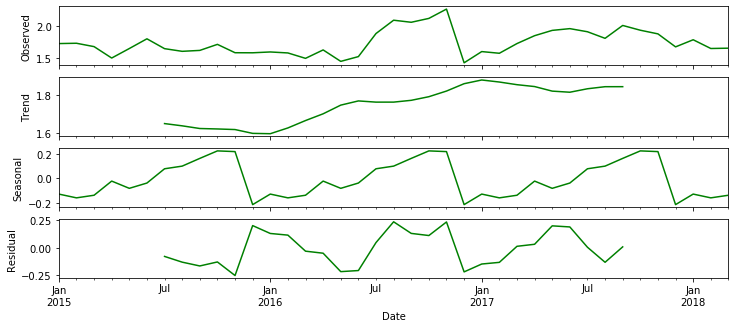

In [88]:
rcParams['figure.figsize'] = 12, 5
decomposition = sm.tsa.seasonal_decompose(priceMS, model='additive')
fig, axes = plt.subplots(4, 1, sharex=True)
decomposition.observed.plot(ax=axes[0], legend=False, color='g')
axes[0].set_ylabel('Observed')
decomposition.trend.plot(ax=axes[1], legend=False, color='g')
axes[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=axes[2], legend=False, color = 'g')
axes[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=axes[3], legend=False, color='g')
axes[3].set_ylabel('Residual')
plt.show()

#### From the results, we can see that our observation is validated. The price of organic avocado in Chicago has a ascending trend. And the price has a pattern of seasonality which is low in Spring/Winter and high in Summer/Fall.